# Define your Search Query

## Key Inputs

In [2]:
search_query = "magnetic levitation" #@param {type:"string"}
# save_folder = "" #@param {type:"string"}
start_date = 2010 #@param {type:"slider", min:1920, max:2022, step:1}
end_date = 2022 #@param {type:"slider", min:1920, max:2022, step:1}

assert(end_date >= start_date)

## Advanced Search Options (Optional)

If searching for multiple keywords, ensure that they are separated by a single comma.

In [1]:
AND_keywords = "" #@param {type:"string"}
OR_keywords = "" #@param {type:"string"}
author = "" #@param {type:"string"}
publisher = "" #@param {type:"string"}
exclusions = "" #@param {type:"string"}

kwargs = {
    'AND_keywords': AND_keywords,
    'OR_keywords': OR_keywords,
    'author': author,
    'publisher': publisher,
    'exclusions': exclusions,
}

# Import Modules + Function Defintions

In [11]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from google.colab import files, output
from time import sleep

%matplotlib inline

In [12]:
def make_gs_url(current_year:int,search_query:str,**kwargs) -> str:
  # at some point add  functionality to include other advanced search options, but for now just focus on year and main search query
  search_query = search_query.replace(' ','+')
  AND_keywords.replace(' ','+')
  url_base = 'https://scholar.google.com/scholar?'
  url = url_base + f'as_q=' + f'&as_epq="{search_query}"' + f'+"{AND_keywords}"' f'&as_ylo={current_year}&as_yhi={current_year}' + '&hl=en&as_sdt=0%2C222'
  # url = url_base + f'as_q=' + f'&as_epq=%22' f'&as_ylo={current_year}&as_yhi={current_year}' + f'as_' + f'&q=%22' + '&hl=en&as_sdt=0%2C222'
  # url_base = 'https://scholar.google.com/scholar?hl=en&as_sdt=0%2C22&as_ylo=2000&as_yhi=2000&q=%22atomic+force+microscopy%22+OR+%22AFM%22&btnG='
  # url = 'https://scholar.google.com/scholar?as_q=&as_epq=&as_oq=%22atomic+force+microscopy%22+AFM&as_eq=machine+learning&as_occt=any&as_sauthors=&as_publication=&as_ylo=2000&as_yhi=2000&hl=en&as_sdt=0%2C22#d=gs_asd&t=1667621660536'
  # test = 'https://scholar.google.com/scholar?as_q=&as_epq=%22experiment%22+%22testing+this%22&as_oq=%22atomic+force+microscopy%22+%22AFM+feedback+control%22&as_eq=machine+learning&as_occt=any&as_sauthors=PJ+Hayes&as_publication=Test&as_ylo=2000&as_yhi=2000&hl=en&as_sdt=0%2C22#d=gs_asd&t=1667622954720'
  return url

In [13]:
def get_webpage_results(search_query:str,start_date:int,end_date:int,**kwargs) -> np.ndarray:
  out = []
  for year in np.arange(start_date,end_date+1):
    print(year)
    url = make_gs_url(year,search_query,**kwargs)
    print(url)
    gs_response = requests.get(url)
    gs_soup = BeautifulSoup(gs_response.text,'html.parser')
    if 'About' in str(gs_soup):
      result_str = str(gs_soup).split('About ')[1].split(' results')[0]
      if '.' in result_str:
        num_pubs = int(result_str.replace('.',''))
      elif ',' in result_str:
        num_pubs = int(result_str.replace(',',''))
    elif '1 result' in str(gs_soup):
      num_pubs = 1
    elif 'did not match any articles published' in str(gs_soup):
      num_pubs = 0
    out.append(num_pubs)
    sleep(0.5)
  return np.array(out)

In [14]:
def plot_pub_data(fig_num:int,start_date:int,end_date:int,search_query:str,pub_data:np.ndarray,figsize=(10,8)):
  fig = plt.figure(fig_num,figsize=figsize)
  plt.bar(np.arange(start_date,end_date+1),pub_data)
  plt.title(f'No. of Publications on ``{search_query}" between {start_date} and {end_date}')
  plt.xlabel('Year')
  plt.show()
  return fig

# LaTEX Figure Formatting (Optional)

In [7]:
from google.colab import output, files

In [8]:
! sudo apt-get install texlive-latex-recommended #1
! sudo apt-get install dvipng texlive-fonts-recommended #2
! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip #3
! unzip type1cm.zip -d /tmp/type1cm #4
! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins  #5
! sudo mkdir /usr/share/texmf/tex/latex/type1cm #6
! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm #7
! sudo texhash #8
output.clear()

In [9]:
import matplotlib
from matplotlib import rc
import matplotlib.pyplot as plt
%matplotlib inline

rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
!apt install texlive-fonts-recommended texlive-fonts-extra cm-super dvipng
output.clear()

# Main Code

In [15]:
# get_webpage_results() --> Obtain the publication data for the given search query settings
pub_data = get_webpage_results(search_query,start_date,end_date,**kwargs)

2010
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2010&as_yhi=2010&hl=en&as_sdt=0%2C222
2011
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2011&as_yhi=2011&hl=en&as_sdt=0%2C222
2012
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2012&as_yhi=2012&hl=en&as_sdt=0%2C222
2013
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2013&as_yhi=2013&hl=en&as_sdt=0%2C222
2014
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2014&as_yhi=2014&hl=en&as_sdt=0%2C222
2015
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2015&as_yhi=2015&hl=en&as_sdt=0%2C222
2016
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2016&as_yhi=2016&hl=en&as_sdt=0%2C222
2017
https://scholar.google.com/scholar?as_q=&as_epq="magnetic+levitation"+""&as_ylo=2017&as_yhi=2017&hl=en&as_sdt=0%2C222
2018
https://sch

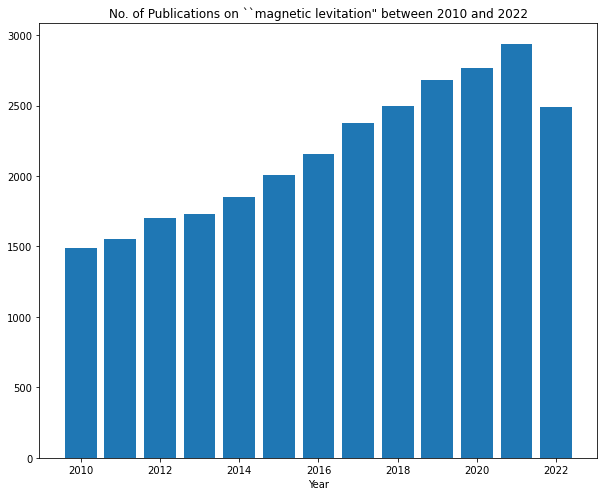

In [16]:
# plot_pub_data() --> plots the pub_data into a nice figure
fig = plot_pub_data(1,start_date,end_date,search_query,pub_data)
fig.savefig('publication-data.png')

In [17]:
files.download('publication-data.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>